# Miscellaneous

This is for generating miscellaneous images that should be repeatable


In [33]:
import matplotlib.pyplot as plt
from PIL import Image
import io


## Route legend

This generates a legend for this image:

![Route comparison of Google Maps and cycle.routes](../images/google_vs_cycle.travel_routes.png)

Red is cycle.travel and blue is Google Maps

- Red: #F857758
- Blue: #6Da1FD


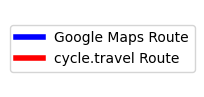

0

In [34]:
# make matplotlib legend with blue and red line
fig = plt.figure(figsize=(1, 1))
ax = fig.add_subplot(111)


# create the legend
legend = ax.legend(
    [
        plt.Line2D([0], [0], color="b", lw=4),
        plt.Line2D([0], [0], color="r", lw=4),
    ],
    ["Google Maps Route", "cycle.travel Route"],
    loc="center",
)
ax.axis("off")

# remove background
fig.patch.set_visible(False)

# show the plot
plt.show()

# save the plot
legend_buffer = io.BytesIO()
fig.savefig(
    legend_buffer,
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)
legend_buffer.seek(0)


Now let's use Pillow to add the legend to the image:


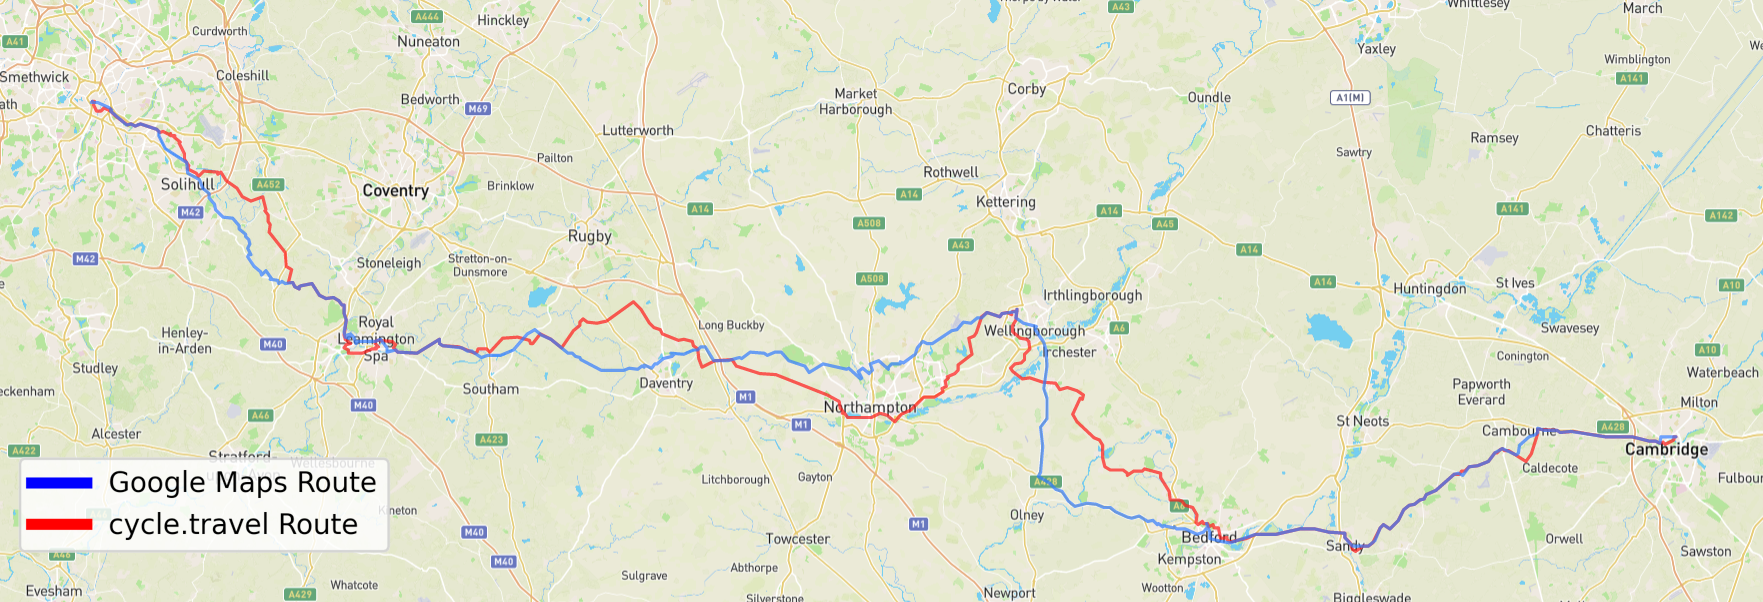

In [35]:
background = Image.open("../images/google_vs_cycle.travel_routes.png")
legend = Image.open(legend_buffer)

# paste in bottom left, scaled by 0.5
SCALE_FACTOR = 1.5
legend.thumbnail((legend.size[0] // SCALE_FACTOR,
                 legend.size[1] // SCALE_FACTOR))
background.paste(legend, (0, background.size[1] - legend.size[1]), legend)
background.save(
    "../images/google_vs_cycle.travel_routes_with_legend.png",
    "PNG",
)
background
